<a href="https://colab.research.google.com/github/abirinpajamas/adhd-prediction-ml-model/blob/main/adhd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

This dataset contains 6,500 rows and 32 columns, and is designed to support mental and behavioral health analysis, specifically for diagnosing Attention Deficit Hyperactivity Disorder (ADHD) and its subtypes. The dataset combines demographic data (like Age, Gender, Educational_Level, and Family_History) with behavioral indicators such as Sleep_Hours, Daily_Activity_Hours, Phone Usage, and Caffeine Consumption.

Collaborator: Ahmed Mohamed

In [2]:
df=pd.read_csv("adhd_data.csv")
df.head()

,Age,Gender,Educational_Level,Family_History,Sleep_Hours,Daily_Activity_Hours,Q1_1,Q1_2,Q1_3,Q1_4,...,Q2_8,Q2_9,Diagnosis_Class,Daily_Phone_Usage_Hours,Daily_Walking_Running_Hours,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels
0,8,1,Primary,No,8,7,0,0,0,1,...,0,1,0,2,0.5,0,5,1,0,0
1,9,2,Primary,No,11,7,3,2,2,3,...,2,3,3,2,0.9,1,6,0,1,3
2,9,1,Primary,No,9,5,3,2,3,3,...,2,3,3,2,1.4,1,3,0,1,3
3,5,2,Kindergarten,Yes,7,11,3,3,3,2,...,0,0,2,6,0.6,1,6,0,1,1
4,13,1,Middle,No,3,0,3,2,3,3,...,1,0,2,4,1.0,1,5,1,1,2


Categorically Encoding "Gender" and "Family History" columns

In [3]:
df['Gender'] = df['Gender'].map({1: 'Male', 2: 'Female'}).astype('category')
df['Family_History']=df['Family_History'].astype('category')


In [4]:
df.head()

,Age,Gender,Educational_Level,Family_History,Sleep_Hours,Daily_Activity_Hours,Q1_1,Q1_2,Q1_3,Q1_4,...,Q2_8,Q2_9,Diagnosis_Class,Daily_Phone_Usage_Hours,Daily_Walking_Running_Hours,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels
0,8,Male,Primary,No,8,7,0,0,0,1,...,0,1,0,2,0.5,0,5,1,0,0
1,9,Female,Primary,No,11,7,3,2,2,3,...,2,3,3,2,0.9,1,6,0,1,3
2,9,Male,Primary,No,9,5,3,2,3,3,...,2,3,3,2,1.4,1,3,0,1,3
3,5,Female,Kindergarten,Yes,7,11,3,3,3,2,...,0,0,2,6,0.6,1,6,0,1,1
4,13,Male,Middle,No,3,0,3,2,3,3,...,1,0,2,4,1.0,1,5,1,1,2


In [5]:
print(df['Gender'].dtype)


category


In [6]:
edu_cat=df['Educational_Level'].unique()
print(edu_cat)

['Primary' 'Kindergarten' 'Middle' 'Secondary' 'Working' 'University'
 'Not Working']


Categorical (Ordinal) Encoding of "Educational Level" column

In [7]:
from pandas.api.types import CategoricalDtype
education_order=['Kindergarten','Primary','Middle','Secondary','University','Working','Not Working']
edu_cat_type=CategoricalDtype(categories=education_order,ordered=True)
df['Educational_Level']=df['Educational_Level'].astype(edu_cat_type)
print("Categories:", df['Educational_Level'].cat.categories)
df.head()

Categories: Index(['Kindergarten', 'Primary', 'Middle', 'Secondary', 'University',
       'Working', 'Not Working'],
      dtype='object')


,Age,Gender,Educational_Level,Family_History,Sleep_Hours,Daily_Activity_Hours,Q1_1,Q1_2,Q1_3,Q1_4,...,Q2_8,Q2_9,Diagnosis_Class,Daily_Phone_Usage_Hours,Daily_Walking_Running_Hours,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels
0,8,Male,Primary,No,8,7,0,0,0,1,...,0,1,0,2,0.5,0,5,1,0,0
1,9,Female,Primary,No,11,7,3,2,2,3,...,2,3,3,2,0.9,1,6,0,1,3
2,9,Male,Primary,No,9,5,3,2,3,3,...,2,3,3,2,1.4,1,3,0,1,3
3,5,Female,Kindergarten,Yes,7,11,3,3,3,2,...,0,0,2,6,0.6,1,6,0,1,1
4,13,Male,Middle,No,3,0,3,2,3,3,...,1,0,2,4,1.0,1,5,1,1,2


Summing all the hyperactivity and inatention questioniarre feature columns into one each for each row

In [8]:
hyperactivity_cols=['Q1_1', 'Q1_2', 'Q1_3', 'Q1_4', 'Q1_5', 'Q1_6', 'Q1_7', 'Q1_8', 'Q1_9']
inattention_cols=['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9']

df['hyperactivity_score']=df[hyperactivity_cols].sum(axis=1)
df['inattention_score']=df[inattention_cols].sum(axis=1)

In [9]:
df.head()

,Age,Gender,Educational_Level,Family_History,Sleep_Hours,Daily_Activity_Hours,Q1_1,Q1_2,Q1_3,Q1_4,...,Diagnosis_Class,Daily_Phone_Usage_Hours,Daily_Walking_Running_Hours,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels,hyperactivity_score,inattention_score
0,8,Male,Primary,No,8,7,0,0,0,1,...,0,2,0.5,0,5,1,0,0,4,6
1,9,Female,Primary,No,11,7,3,2,2,3,...,3,2,0.9,1,6,0,1,3,21,24
2,9,Male,Primary,No,9,5,3,2,3,3,...,3,2,1.4,1,3,0,1,3,23,21
3,5,Female,Kindergarten,Yes,7,11,3,3,3,2,...,2,6,0.6,1,6,0,1,1,23,3
4,13,Male,Middle,No,3,0,3,2,3,3,...,2,4,1.0,1,5,1,1,2,23,5


Dropping the seperate questioniarre feature columns to maintain Data Clarity

In [10]:
drop_cols=inattention_cols+hyperactivity_cols
df.drop(columns=drop_cols,inplace=True)

In [11]:
df.head()

,Age,Gender,Educational_Level,Family_History,Sleep_Hours,Daily_Activity_Hours,Diagnosis_Class,Daily_Phone_Usage_Hours,Daily_Walking_Running_Hours,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels,hyperactivity_score,inattention_score
0,8,Male,Primary,No,8,7,0,2,0.5,0,5,1,0,0,4,6
1,9,Female,Primary,No,11,7,3,2,0.9,1,6,0,1,3,21,24
2,9,Male,Primary,No,9,5,3,2,1.4,1,3,0,1,3,23,21
3,5,Female,Kindergarten,Yes,7,11,2,6,0.6,1,6,0,1,1,23,3
4,13,Male,Middle,No,3,0,2,4,1.0,1,5,1,1,2,23,5


Encoding categorical variables

In [12]:
df['Learning_Difficulties']=df['Learning_Difficulties'].astype('category')
df['Difficulty_Organizing_Tasks']=df['Difficulty_Organizing_Tasks'].astype('category')

In [13]:
all_cols=df.columns.to_list()
all_cols.remove('Diagnosis_Class')
new_cols=all_cols+['Diagnosis_Class']
df=df[new_cols]

In [14]:
df.head()

,Age,Gender,Educational_Level,Family_History,Sleep_Hours,Daily_Activity_Hours,Daily_Phone_Usage_Hours,Daily_Walking_Running_Hours,Difficulty_Organizing_Tasks,Focus_Score_Video,Daily_Coffee_Tea_Consumption,Learning_Difficulties,Anxiety_Depression_Levels,hyperactivity_score,inattention_score,Diagnosis_Class
0,8,Male,Primary,No,8,7,2,0.5,0,5,1,0,0,4,6,0
1,9,Female,Primary,No,11,7,2,0.9,1,6,0,1,3,21,24,3
2,9,Male,Primary,No,9,5,2,1.4,1,3,0,1,3,23,21,3
3,5,Female,Kindergarten,Yes,7,11,6,0.6,1,6,0,1,1,23,3,2
4,13,Male,Middle,No,3,0,4,1.0,1,5,1,1,2,23,5,2


In [15]:
df.columns=df.columns.str.lower()
df.head()

,age,gender,educational_level,family_history,sleep_hours,daily_activity_hours,daily_phone_usage_hours,daily_walking_running_hours,difficulty_organizing_tasks,focus_score_video,daily_coffee_tea_consumption,learning_difficulties,anxiety_depression_levels,hyperactivity_score,inattention_score,diagnosis_class
0,8,Male,Primary,No,8,7,2,0.5,0,5,1,0,0,4,6,0
1,9,Female,Primary,No,11,7,2,0.9,1,6,0,1,3,21,24,3
2,9,Male,Primary,No,9,5,2,1.4,1,3,0,1,3,23,21,3
3,5,Female,Kindergarten,Yes,7,11,6,0.6,1,6,0,1,1,23,3,2
4,13,Male,Middle,No,3,0,4,1.0,1,5,1,1,2,23,5,2


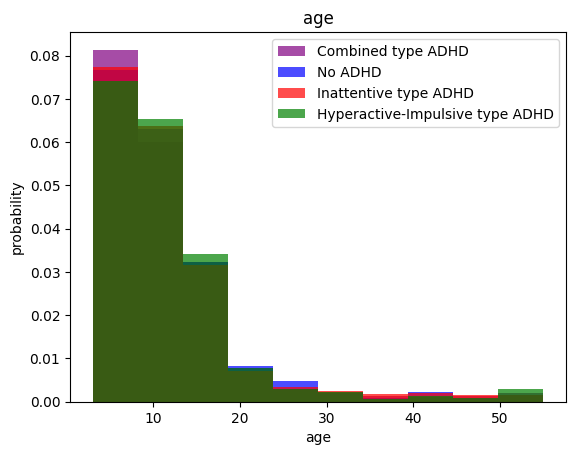

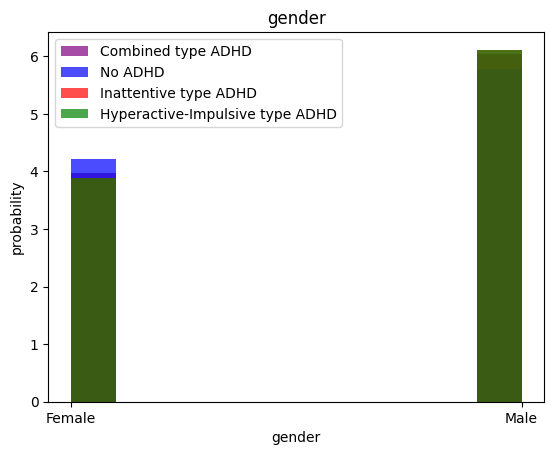

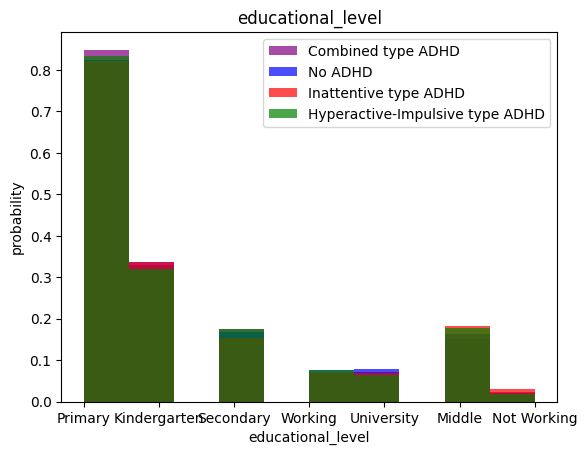

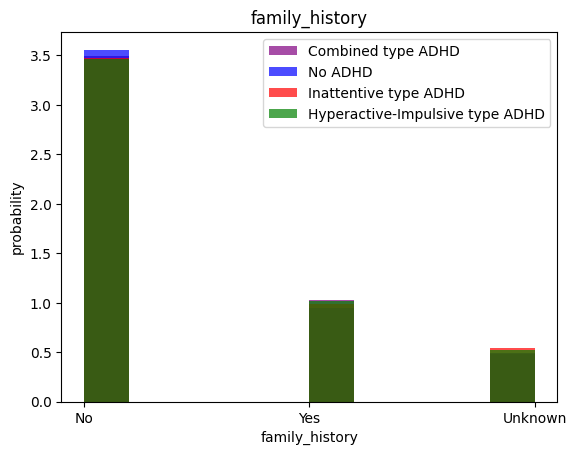

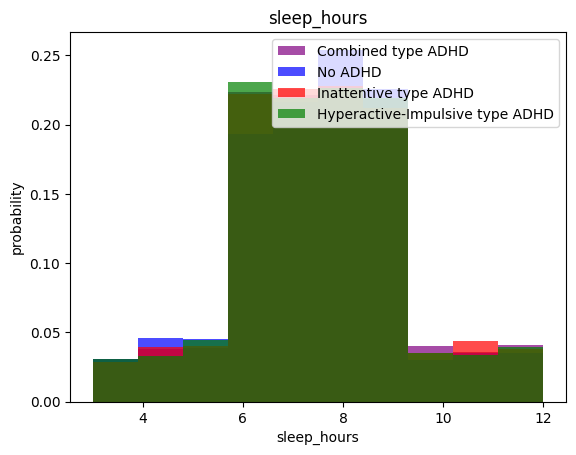

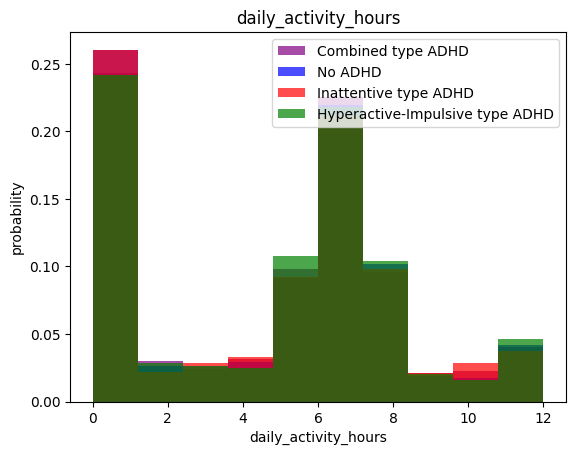

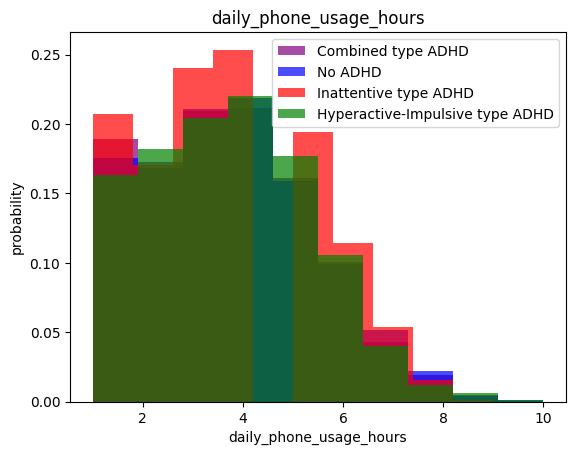

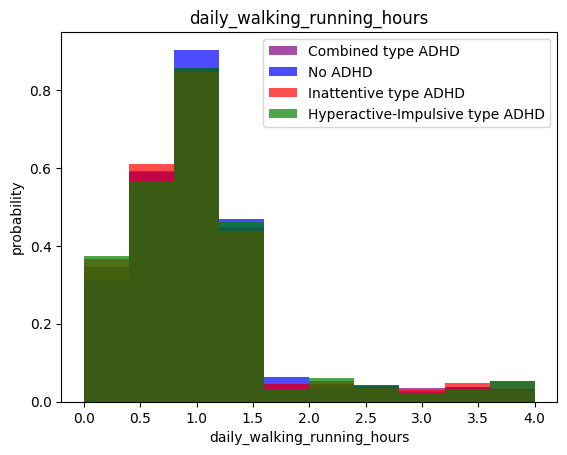

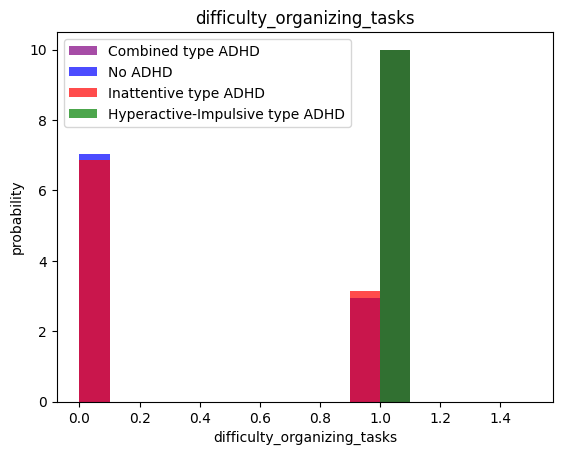

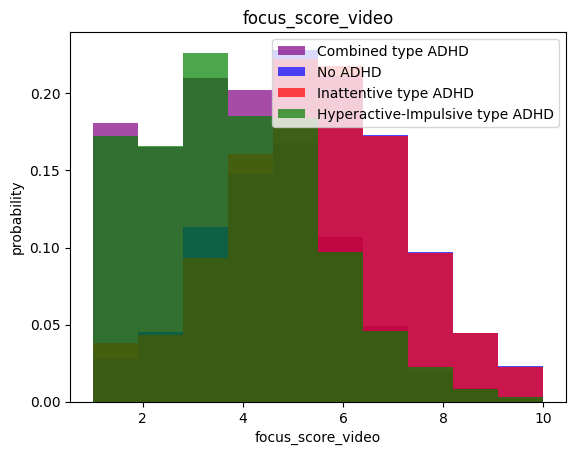

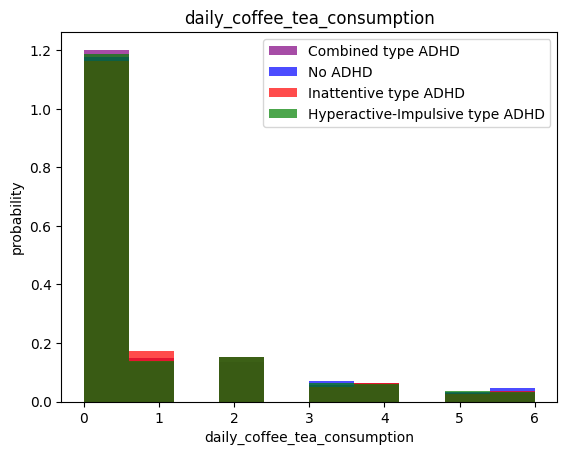

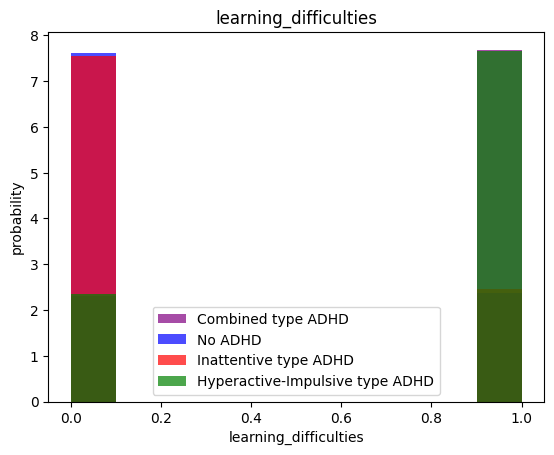

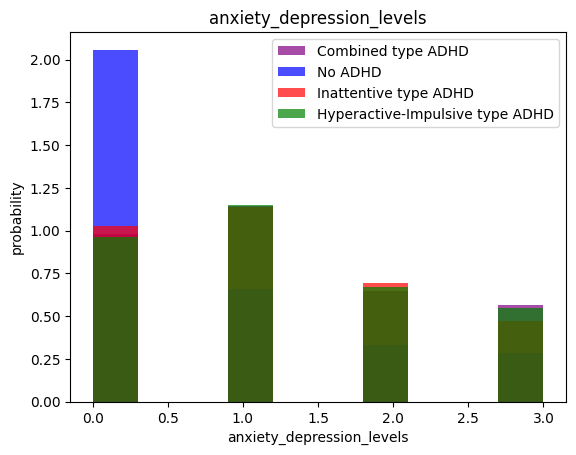

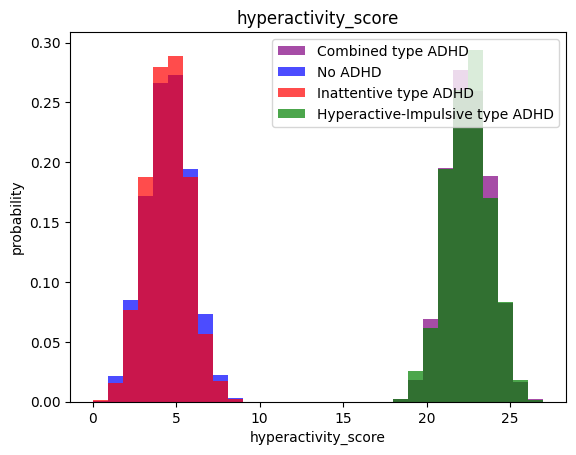

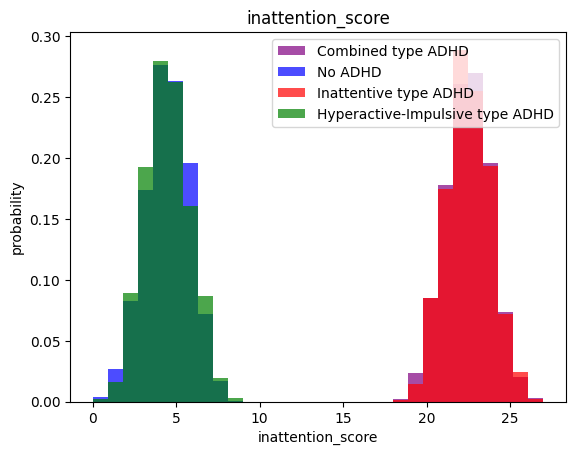

In [16]:
for label in df.columns[:-1]:
  plt.hist(df[df["diagnosis_class"]==3][label], color='purple',label='Combined type ADHD',density=True,alpha=0.7)
  plt.hist(df[df["diagnosis_class"]==0][label], color='blue',label='No ADHD',density=True,alpha=0.7)
  plt.hist(df[df["diagnosis_class"]==1][label], color='red',label='Inattentive type ADHD',density=True,alpha=0.7)
  plt.hist(df[df["diagnosis_class"]==2][label], color='green',label='Hyperactive-Impulsive type ADHD',density=True,alpha=0.7)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('probability')
  plt.legend()
  plt.show()

In [34]:
training,validation,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Class Distribution before Oversampling and Scaling

In [35]:
df['diagnosis_class'].value_counts()

,count
diagnosis_class,
3,2800
0,1600
2,1050
1,1050


In [39]:
def scale_dataset(dataframe,training,oversampling=False):
 num_cols = [
  'age',
  'sleep_hours',
  'daily_activity_hours',
  'daily_phone_usage_hours',
  'daily_walking_running_hours',
  'daily_coffee_tea_consumption',
  'focus_score_video',
  'anxiety_depression_levels',
  'hyperactivity_score',
  'inattention_score'
 ]
 x=dataframe[num_cols].values
 training=training[num_cols].values
 y=dataframe['diagnosis_class'].values

 scaler=StandardScaler().fit(training)
 x=scaler.transform(x)
 if oversampling:
  ros=RandomOverSampler()
  x,y=ros.fit_resample(x,y)
 data=np.hstack((x,np.reshape(y,(-1,1))))

 return data,x,y;



In [40]:
train,x_train,y_train=scale_dataset(training,training,oversampling=True)
validation,x_validation,y_validation=scale_dataset(validation,training,oversampling=False)
test,x_test,y_test=scale_dataset(test,training,oversampling=False)


Class Disribution of Train dataset after Scaling and Oversamplng

In [41]:
print(sum(y_train==0))
print(sum(y_train==1))
print(sum(y_train==2))
print(sum(y_train==3))

1692
1692
1692
1692


In [42]:
print(sum(y_test==0))
print(sum(y_test==1))
print(sum(y_test==2))
print(sum(y_test==3))

333
207
191
569


KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [59]:
knn_model=KNeighborsClassifier(n_neighbors=50)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [60]:
y_pred=knn_model.predict(x_test)

In [61]:
y_pred

array([3, 1, 2, ..., 2, 3, 3])

In [62]:
y_test

array([3, 1, 2, ..., 2, 3, 3])

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       333
           1       0.98      1.00      0.99       207
           2       0.99      0.99      0.99       191
           3       1.00      1.00      1.00       569

    accuracy                           1.00      1300
   macro avg       0.99      1.00      0.99      1300
weighted avg       1.00      1.00      1.00      1300



In [58]:
print(x_train[:5])
print(x_test[:5])

[[ 0.27540742 -0.28376479  0.94688885  0.23778244  0.12214948 -0.52238705
  -0.15468859 -1.02398636  0.64262596  0.97776258]
 [-1.02094744 -0.28376479 -1.11287734 -0.31224812  0.12214948 -0.52238705
  -0.62490333  1.82447783  0.75414829  0.7553494 ]
 [-1.02094744  0.2475279   0.94688885 -1.41230925 -0.58527996 -0.52238705
  -1.5653328   0.87498977  0.64262596  0.7553494 ]
 [-0.66739611 -0.28376479 -1.11287734 -0.86227868 -0.30230818 -0.52238705
   1.25595562 -1.02398636 -1.36477593 -1.57998906]
 [-1.02094744  2.37269868  2.12389811  0.78781301 -0.58527996 -0.52238705
  -0.62490333 -1.02398636 -1.14173127 -1.24636928]]
[[-0.07814391 -0.28376479 -1.40712965 -0.86227868 -0.16082229 -0.52238705
  -0.15468859  0.87498977  0.86567062  0.97776258]
 [ 0.74680918  0.2475279   0.65263654  2.4379047   0.68809304 -0.52238705
   0.31552614 -0.07449829 -1.14173127  0.53293621]
 [-0.07814391  0.2475279   2.12389811  0.78781301 -0.72676585 -0.52238705
  -0.62490333 -1.02398636  0.86567062 -1.13516269]